In [1]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt

In [2]:
class ImageOperations():
    def __init__(self):
        pass

    def load_image(self, path: str) -> tuple[np.ndarray, str]:
        if not path:
            raise ValueError("No path specified!")
        
        input_image = cv.imread(path, cv.IMREAD_UNCHANGED)
        image_type = self.image_type(input_image)

        if(image_type == 'rgb'):
            input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
        
        return input_image, image_type

    def print_image(self, input_image:np.ndarray) -> None:
        if input_image is None:
            raise ValueError("No input image specified!")

        plt.imshow(input_image)

    def save_image(self, output_image: np.ndarray, image_name: str) -> None:
        if not image_name:
            raise ValueError("No path specified!")

        if output_image is None:
            raise ValueError("No output image specified!")
        
        cv.imwrite(image_name, output_image)
    
    def image_type(self, input_image: np.ndarray) -> str:
        try:
            height, width, channels = input_image.shape
        except ValueError:
            height, width = input_image.shape
            channels = None
        if channels:
            return 'rgb'
        
        for x in range(height):
            for y in range(width):
                if input_image[x, y].all() != 0 and input_image[x, y].all() != 255:
                    return 'mono'

        return 'binary'
        

In [3]:
class ConvertImageType():
    def __init__(self):
        pass

    def rgb2hsv(self, rgb: np.ndarray, image_type: str) -> np.ndarray:
        """ convert RGB to HSV color space"""
        if not image_type or image_type != 'rgb':
            raise ValueError("Wrong image type!")

        rgb = rgb.astype('float')
        maxv = np.amax(rgb, axis=2)
        maxc = np.argmax(rgb, axis=2)
        minv = np.amin(rgb, axis=2)
        minc = np.argmin(rgb, axis=2)

        hsv = np.zeros(rgb.shape, dtype='float')
        hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
        hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
        hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
        hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
        hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
        hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
        hsv[..., 2] = maxv

        return hsv, 'HSV'

    def hsv2rgb(self, hsv: np.ndarray, image_type: str) -> np.ndarray:
        """ convert HSV to RGB color space"""
        if not image_type or image_type != 'rgb':
            raise ValueError("Wrong image type!")

        hi = np.floor(hsv[..., 0] / 60.0) % 6
        hi = hi.astype('uint8')
        v = hsv[..., 2].astype('float')
        f = (hsv[..., 0] / 60.0) - np.floor(hsv[..., 0] / 60.0)
        p = v * (1.0 - hsv[..., 1])
        q = v * (1.0 - (f * hsv[..., 1]))
        t = v * (1.0 - ((1.0 - f) * hsv[..., 1]))

        rgb = np.zeros(hsv.shape)
        rgb[hi == 0, :] = np.dstack((v, t, p))[hi == 0, :]
        rgb[hi == 1, :] = np.dstack((q, v, p))[hi == 1, :]
        rgb[hi == 2, :] = np.dstack((p, v, t))[hi == 2, :]
        rgb[hi == 3, :] = np.dstack((p, q, v))[hi == 3, :]
        rgb[hi == 4, :] = np.dstack((t, p, v))[hi == 4, :]
        rgb[hi == 5, :] = np.dstack((v, p, q))[hi == 5, :]

        return rgb, 'rgb'

In [4]:
operations = ImageOperations()
converter = ConvertImageType()

image, image_type = operations.load_image('color.jpg')
hsv_image, hsv_type = converter.rgb2hsv(image, image_type)
# plt.imshow(hsv_image)

# rgb_img = converter.hsv2rgb(hsv_image, 'RGB')
# plt.imshow(rgb_img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


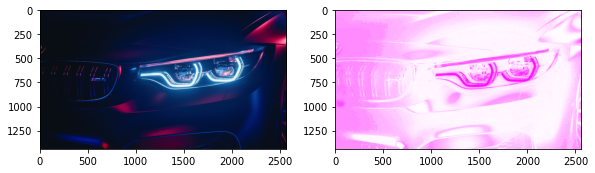

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(131).imshow(image)
plt.subplot(132).imshow(hsv_image)

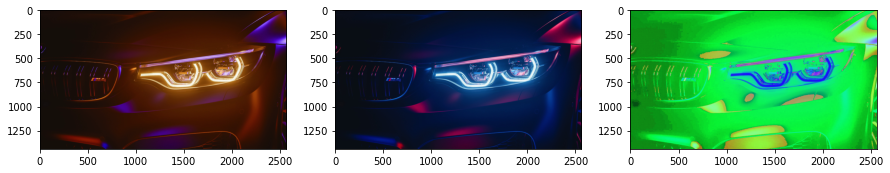

In [6]:
a = cv.imread('color.jpg')
b = cv.cvtColor(a, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.subplot(131).imshow(a)
plt.subplot(132).imshow(b)
c = cv.cvtColor(a, cv.COLOR_RGB2HSV)
plt.subplot(133).imshow(c)